In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Define colors for activities
activity_colors = {
    'standing': '#1f77b4',
    'walking': '#ff7f0e',
    'jumping': '#2ca02c',
    'still': '#d62728'
}

In [19]:
features_df = pd.read_csv('./data/extracted_datasets/extracted_test_features.csv')
test_data =  pd.read_csv('./data/extracted_datasets/extracted_test_features.csv')

In [20]:
features_df.head()

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id,source_file
0,-0.015123,0.085285,0.007274,-0.171210,0.172360,0.343570,-0.014965,0.065722,0.086615,-0.132085,...,0.082009,0.056786,0.158072,0.238277,0.052802,standing8,Jean,8,0,combined_test_data_wide.csv
1,0.009499,0.086401,0.007465,-0.208689,0.138782,0.347472,0.036865,0.053930,0.086922,-0.791803,...,0.071908,0.049370,-0.131949,0.031749,-0.080576,standing8,Jean,8,1,combined_test_data_wide.csv
2,0.009138,0.075390,0.005684,-0.208689,0.138782,0.347472,0.004663,0.043718,0.075942,-0.817064,...,0.068318,0.044225,0.591124,0.227265,0.059238,standing8,Jean,8,2,combined_test_data_wide.csv
3,-0.006388,0.051174,0.002619,-0.108277,0.110761,0.219037,0.000689,0.034623,0.051572,-0.017052,...,0.078880,0.051618,0.529714,0.302380,-0.073445,standing8,Jean,8,3,combined_test_data_wide.csv
4,-0.025488,0.057760,0.003336,-0.108277,0.094240,0.202517,-0.022584,0.049552,0.063134,0.405779,...,0.082356,0.054698,-0.061533,0.517865,-0.175328,standing8,Jean,8,4,combined_test_data_wide.csv


In [21]:
print(features_df.shape, test_data.shape) # train_data.shape, test_data.shape

(367, 123) (367, 123)


In [22]:
print(features_df.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['acc_x_mean', 'acc_x_std', 'acc_x_var', 'acc_x_min', 'acc_x_max',
       'acc_x_range', 'acc_x_median', 'acc_x_mad', 'acc_x_rms',
       'acc_x_skewness',
       ...
       'gyr_sma', 'gyr_smv', 'gyr_corr_xy', 'gyr_corr_xz', 'gyr_corr_yz',
       'activity', 'subject', 'session', 'window_id', 'source_file'],
      dtype='object', length=123)>


In [23]:
features_df.drop(columns=['source_file'], inplace=True), test_data.drop(columns=['source_file'], inplace=True)

(None, None)

In [24]:
test_data.head(5)

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,acc_corr_yz,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id
0,-0.015123,0.085285,0.007274,-0.171210,0.172360,0.343570,-0.014965,0.065722,0.086615,-0.132085,...,-0.323340,0.082009,0.056786,0.158072,0.238277,0.052802,standing8,Jean,8,0
1,0.009499,0.086401,0.007465,-0.208689,0.138782,0.347472,0.036865,0.053930,0.086922,-0.791803,...,-0.320594,0.071908,0.049370,-0.131949,0.031749,-0.080576,standing8,Jean,8,1
2,0.009138,0.075390,0.005684,-0.208689,0.138782,0.347472,0.004663,0.043718,0.075942,-0.817064,...,-0.301966,0.068318,0.044225,0.591124,0.227265,0.059238,standing8,Jean,8,2
3,-0.006388,0.051174,0.002619,-0.108277,0.110761,0.219037,0.000689,0.034623,0.051572,-0.017052,...,-0.162716,0.078880,0.051618,0.529714,0.302380,-0.073445,standing8,Jean,8,3
4,-0.025488,0.057760,0.003336,-0.108277,0.094240,0.202517,-0.022584,0.049552,0.063134,0.405779,...,0.115740,0.082356,0.054698,-0.061533,0.517865,-0.175328,standing8,Jean,8,4


In [25]:
features_df.isnull().sum()

acc_x_mean     0
acc_x_std      0
acc_x_var      0
acc_x_min      0
acc_x_max      0
              ..
gyr_corr_yz    0
activity       0
subject        0
session        0
window_id      0
Length: 122, dtype: int64

In [26]:
numeric_features = features_df.select_dtypes(include=[np.number]).columns
print(features_df[numeric_features[:10]].describe())

print("\n3.5 Activities in Features:")
feature_activity_counts = features_df['activity'].value_counts().sort_index()
print(feature_activity_counts)

       acc_x_mean   acc_x_std   acc_x_var   acc_x_min   acc_x_max  \
count  367.000000  367.000000  367.000000  367.000000  367.000000   
mean    -0.110648    1.237141    6.205690   -3.691486    1.447152   
std      0.465308    2.165166   15.653900    6.986025    2.132674   
min     -2.632107    0.002751    0.000008  -32.597130   -0.335811   
25%     -0.207867    0.006709    0.000045   -2.454331    0.013226   
50%     -0.001110    0.242005    0.058566   -0.221727    0.175920   
75%      0.002145    1.127132    1.270597   -0.013338    2.187192   
max      1.469608    9.965429   99.309766    0.596676    8.791828   

       acc_x_range  acc_x_median   acc_x_mad   acc_x_rms  acc_x_skewness  
count   367.000000    367.000000  367.000000  367.000000      367.000000  
mean      5.138638      0.218457    0.502122    1.315763       -0.372335  
std       8.741003      0.742409    0.780925    2.171513        0.877227  
min       0.011230     -1.338087    0.001650    0.003050       -4.700236  
25%

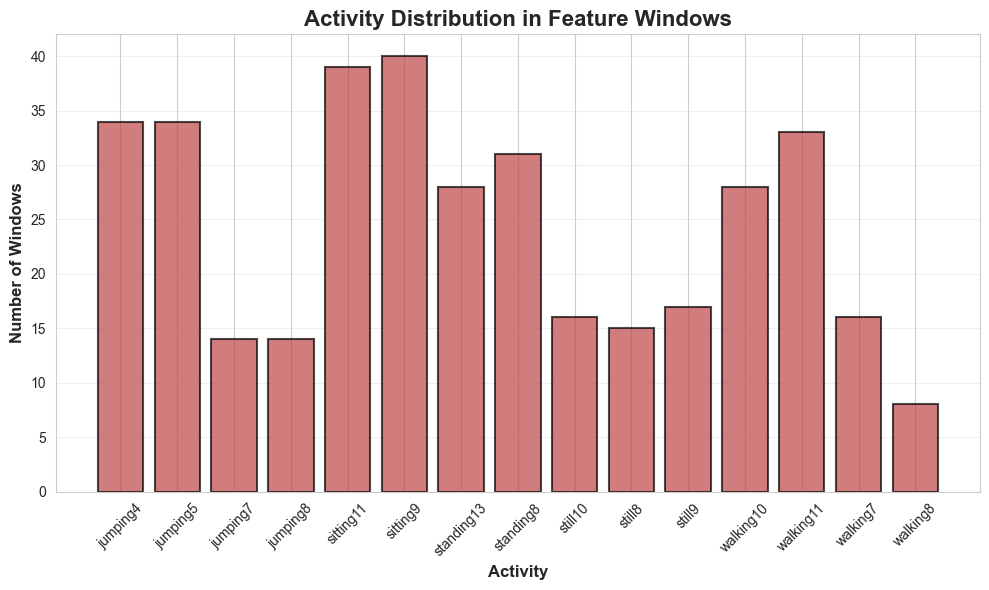

In [27]:
plt.figure(figsize=(10, 6))
colors_list = [activity_colors.get(act.lower(), "#C04646") for act in feature_activity_counts.index]
bars = plt.bar(feature_activity_counts.index, feature_activity_counts.values, 
               color=colors_list, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Activity Distribution in Feature Windows', fontsize=16, fontweight='bold')
plt.xlabel('Activity', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Windows', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()


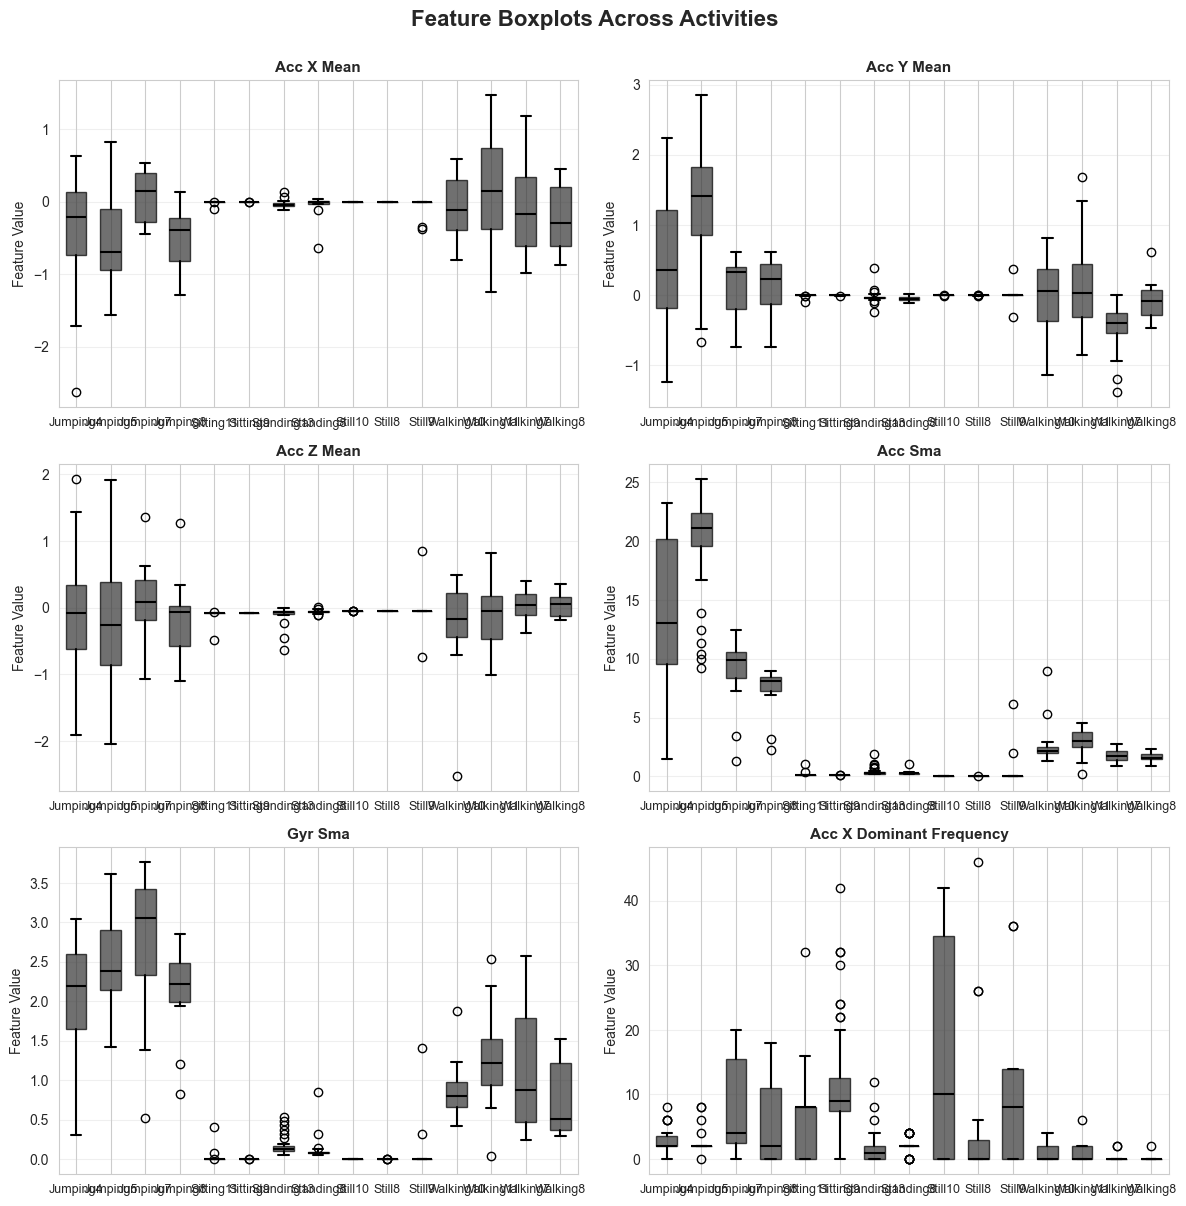

In [28]:
# Select features for boxplots
boxplot_features = [
    'acc_x_mean', 'acc_y_mean', 'acc_z_mean',
    'acc_sma', 'gyr_sma', 'acc_x_dominant_frequency'
]
boxplot_features = [f for f in boxplot_features if f in features_df.columns]

n_cols = 2
n_rows = (len(boxplot_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if isinstance(axes, plt.Axes) else axes

for idx, feature in enumerate(boxplot_features):
    ax = axes[idx]
    
    data_to_plot = []
    labels = []
    colors_list = []
    
    for activity in sorted(features_df['activity'].unique()):
        activity_data = features_df[features_df['activity'] == activity][feature]
        data_to_plot.append(activity_data)
        labels.append(activity.capitalize())
        colors_list.append(activity_colors.get(activity.lower(), '#333333'))
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, widths=0.6)
    
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.5)
    
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Feature Value', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', labelsize=9)

# Hide unused subplots
for idx in range(len(boxplot_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Boxplots Across Activities', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()


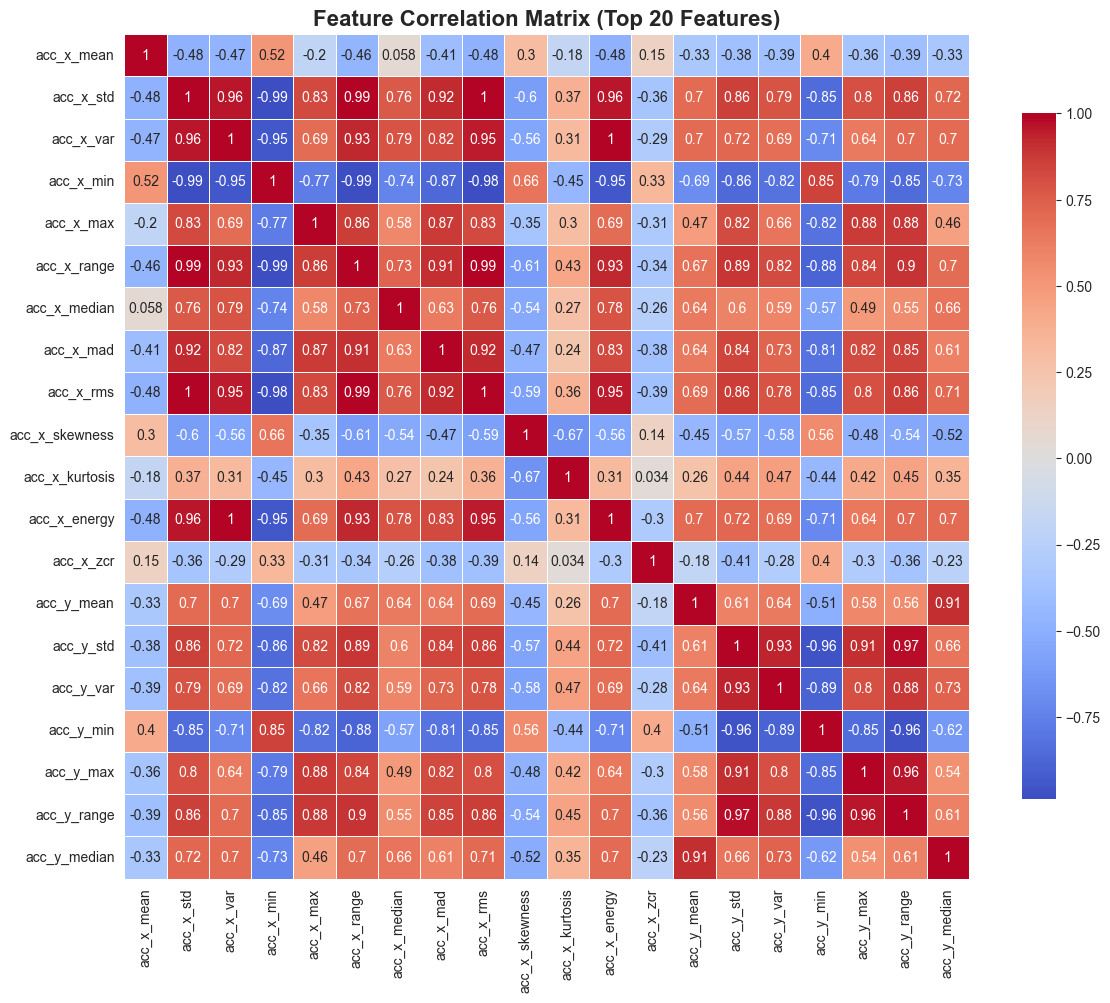

In [29]:
# Select numeric columns
numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Limit to top features for clearer visualization
top_n = 20
if len(numeric_cols) > top_n:
    numeric_cols = numeric_cols[:top_n]

# Calculate correlation matrix
corr_matrix = features_df[numeric_cols].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
           annot=True, 
           cmap='coolwarm', 
           center=0,
           square=True, 
           linewidths=0.5, 
           cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix (Top 20 Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

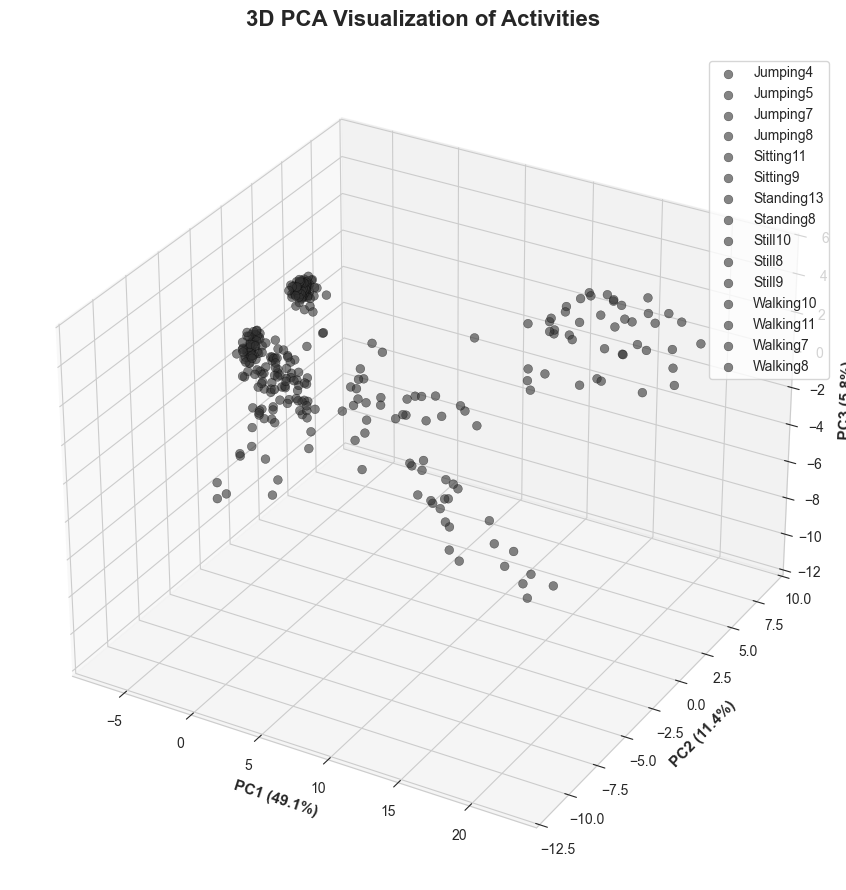

In [30]:

numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

X = features_df[numeric_cols].fillna(0).values
y = features_df['activity'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for activity in sorted(set(y)):
    mask = y == activity
    color = activity_colors.get(activity.lower(), '#333333')
    ax.scatter(X_pca_3d[mask, 0], 
              X_pca_3d[mask, 1], 
              X_pca_3d[mask, 2],
              label=activity.capitalize(), 
              alpha=0.6, 
              color=color, 
              s=40, 
              edgecolors='black', 
              linewidth=0.3)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_title('3D PCA Visualization of Activities', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Define Model Components

In [54]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder


# Load preprocessed or merged feature data
train_data = pd.read_csv('Data/merged_datasets/combined_train_data.csv')
test_data = pd.read_csv('Data/merged_datasets/combined_test_data.csv')


def clean_label(label):
    return re.sub('[^a-zA-Z]', '', str(label)).lower().strip()

train_data['activity'] = train_data['activity'].apply(clean_label)


# Encode unique activity labels (hidden states)
le = LabelEncoder()
le.fit(train_data['activity'])
states = le.classes_
n_states = len(states)

print(f" Hidden States (Activities): {states}")
print(f" Number of States (n): {n_states}")

# Hidden States (Z)
hidden_states = states

observation_description = "Feature vectors derived from accelerometer and gyroscope signals (time + frequency domain)."

# Transition Probability Matrix (A)
A = np.full((n_states, n_states), 1.0 / n_states)  # uniform transition probabilities

# Emission Probabilities (B)
B_description = "Emission probabilities are modeled as Gaussian distributions over features."

# Initial State Probabilities (π)
pi = np.full(n_states, 1.0 / n_states)

# Display defined components
print("\n--- HMM Components Defined ---")
print(f"Hidden States (Z): {hidden_states}")
print(f"Transition Matrix (A) shape: {A.shape}")
print(f"Initial Probabilities (π): {pi}")
print(f"Emission Model: {B_description}")

# Save Components (for consistency in Task 4 & 5)
hmm_components = {
    "states": hidden_states,
    "transition_matrix": A,
    "initial_probs": pi,
    "emission_model": B_description,
    "observations": observation_description
}

print("\n HMM Components successfully defined and ready for training.")


 Hidden States (Activities): ['jumpin' 'jumping' 'sitting' 'standing' 'still' 'walking']
 Number of States (n): 6

--- HMM Components Defined ---
Hidden States (Z): ['jumpin' 'jumping' 'sitting' 'standing' 'still' 'walking']
Transition Matrix (A) shape: (6, 6)
Initial Probabilities (π): [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Emission Model: Emission probabilities are modeled as Gaussian distributions over features.

 HMM Components successfully defined and ready for training.


## Model Implementation

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from hmmlearn import hmm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import joblib
import re

# Load and Prepare Data
train_data = pd.read_csv('Data/merged_datasets/combined_train_data.csv')
test_data = pd.read_csv('Data/merged_datasets/combined_test_data.csv')

# Clean activity labels
def clean_label(label):
    return re.sub('[^a-zA-Z]', '', str(label)).lower().strip()

train_data['activity'] = train_data['activity'].apply(clean_label)
test_data['activity'] = test_data['activity'].apply(clean_label)

# Drop non-numeric columns except target 
non_numeric_cols = train_data.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'activity']

if non_numeric_cols:
    print(f"🧹 Dropping non-numeric columns: {non_numeric_cols}")
    train_data = train_data.drop(columns=non_numeric_cols)
    test_data = test_data.drop(columns=[c for c in non_numeric_cols if c in test_data.columns])

# Encode labels
le = LabelEncoder()
le.fit(train_data['activity'])

# Split features and labels
X_train = train_data.drop(columns=['activity'])
y_train = train_data['activity']

X_test = test_data.drop(columns=['activity'])
y_test = test_data['activity']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for later use
joblib.dump(scaler, "trained_scaler.pkl")

print("⚙️ Training global GaussianHMM...")

n_states = len(le.classes_)
global_hmm = hmm.GaussianHMM(
    n_components=n_states,
    covariance_type='diag',
    n_iter=100,
    random_state=42,
    init_params="stmc"
)

global_hmm.fit(X_train_scaled)

# Predict and evaluate
y_pred_global_enc = global_hmm.predict(X_test_scaled)
y_pred_global = le.inverse_transform(y_pred_global_enc)

acc_global = accuracy_score(y_test, y_pred_global)
f1_global = f1_score(y_test, y_pred_global, average='weighted')
precision_global = precision_score(y_test, y_pred_global, average='weighted')
recall_global = recall_score(y_test, y_pred_global, average='weighted')

print("\n📊 Global HMM Performance:")
print(f"Accuracy:  {acc_global:.3f}")
print(f"F1-score:  {f1_global:.3f}")
print(f"Precision: {precision_global:.3f}")
print(f"Recall:    {recall_global:.3f}")
print(classification_report(y_test, y_pred_global))

# Per-Class Supervised HMMs
print("\n⚙️ Training per-class supervised HMMs...")

class_models = {}
for state in le.classes_:
    X_class = X_train_scaled[y_train == state]
    if len(X_class) < n_states:
        print(f"⚠️ Skipping class '{state}' (not enough samples).")
        continue

    model = hmm.GaussianHMM(
        n_components=1,
        covariance_type='diag',
        n_iter=100,
        random_state=42
    )
    model.fit(X_class)
    class_models[state] = model

# Predict by assigning each test sequence to the most likely class
y_pred_supervised = []
for x in X_test_scaled:
    scores = {label: m.score([x]) for label, m in class_models.items()}
    best_label = max(scores, key=scores.get)
    y_pred_supervised.append(best_label)

# Evaluate
acc_supervised = accuracy_score(y_test, y_pred_supervised)
f1_supervised = f1_score(y_test, y_pred_supervised, average='weighted')
precision_supervised = precision_score(y_test, y_pred_supervised, average='weighted')
recall_supervised = recall_score(y_test, y_pred_supervised, average='weighted')

print("\n📊 Per-Class Supervised HMM Performance:")
print(f"Accuracy:  {acc_supervised:.3f}")
print(f"F1-score:  {f1_supervised:.3f}")
print(f"Precision: {precision_supervised:.3f}")
print(f"Recall:    {recall_supervised:.3f}")
print(classification_report(y_test, y_pred_supervised))

# Choose and Save Best Model
if acc_supervised >= acc_global:
    best_model = class_models
    joblib.dump(best_model, "trained_supervised_hmm.pkl")
    print("✅ Saved best model: trained_supervised_hmm.pkl (Per-Class HMM)")
else:
    best_model = global_hmm
    joblib.dump(best_model, "trained_global_hmm.pkl")
    print("✅ Saved best model: trained_global_hmm.pkl (Global HMM)")

print("\n🎯 Best model selected based on accuracy.")


🧹 Dropping non-numeric columns: ['subject']
⚙️ Training global GaussianHMM...


Model is not converging.  Current: 19279.859137047675 is not greater than 19279.909744900004. Delta is -0.05060785232853959



📊 Global HMM Performance:
Accuracy:  0.164
F1-score:  0.130
Precision: 0.108
Recall:    0.164
              precision    recall  f1-score   support

      jumpin       0.00      0.00      0.00         0
     jumping       0.00      0.00      0.00      2396
     sitting       0.00      0.00      0.00      1979
    standing       0.00      0.00      0.00      1461
       still       0.00      0.00      0.00      1213
     walking       0.46      0.70      0.55      2152

    accuracy                           0.16      9201
   macro avg       0.08      0.12      0.09      9201
weighted avg       0.11      0.16      0.13      9201


⚙️ Training per-class supervised HMMs...

📊 Per-Class Supervised HMM Performance:
Accuracy:  0.882
F1-score:  0.881
Precision: 0.906
Recall:    0.882
              precision    recall  f1-score   support

     jumping       0.98      0.68      0.81      2396
     sitting       0.92      1.00      0.95      1979
    standing       0.98      0.82      0.89     

## Model Evaluation with Unseen Data


In [57]:
import numpy as np
import pandas as pd
import joblib
import re
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# Load Best Model and Scaler
try:
    best_model = joblib.load("trained_supervised_hmm.pkl")
    model_type = "Per-Class Supervised HMM"
except FileNotFoundError:
    try:
        best_model = joblib.load("trained_global_hmm.pkl")
        model_type = "Global GaussianHMM"
    except FileNotFoundError:
        raise FileNotFoundError("No trained model found. Please run Task 4 first.")

scaler = joblib.load("trained_scaler.pkl")
le = joblib.load("trained_label_encoder.pkl") if "trained_label_encoder.pkl" in locals() else None

print(f"Loaded model: {model_type}")
print("Scaler loaded successfully.")


# Load and Prepare Unseen Data
unseen_data = pd.read_csv("Data/merged_datasets/combined_test_data.csv")  

def clean_label(label):
    return re.sub('[^a-zA-Z]', '', str(label)).lower().strip()

unseen_data['activity'] = unseen_data['activity'].apply(clean_label)

# Drop non-numeric columns except target
non_numeric_cols = unseen_data.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'activity']

if non_numeric_cols:
    print(f"🧹 Dropping non-numeric columns from unseen data: {non_numeric_cols}")
    unseen_data = unseen_data.drop(columns=non_numeric_cols)

# Split and scale features
X_unseen = unseen_data.drop(columns=['activity'])
y_unseen = unseen_data['activity']

X_unseen_scaled = scaler.transform(X_unseen)


# Predict Using the Loaded Model
print(f"\n🚀 Evaluating {model_type} on Unseen Data...")

if isinstance(best_model, dict):  # Per-class HMMs
    y_pred_unseen = []
    for x in X_unseen_scaled:
        scores = {label: m.score([x]) for label, m in best_model.items()}
        best_label = max(scores, key=scores.get)
        y_pred_unseen.append(best_label)
else:  
    y_pred_unseen_enc = best_model.predict(X_unseen_scaled)
    y_pred_unseen = le.inverse_transform(y_pred_unseen_enc) if le else y_pred_unseen_enc


# 4️⃣ Compute and Display Evaluation Metrics
acc = accuracy_score(y_unseen, y_pred_unseen)
f1 = f1_score(y_unseen, y_pred_unseen, average='weighted')
precision = precision_score(y_unseen, y_pred_unseen, average='weighted')
recall = recall_score(y_unseen, y_pred_unseen, average='weighted')

print("\n📊 Model Performance on Unseen Data:")
print(f"Accuracy:  {acc:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_unseen, y_pred_unseen))


# Per-Activity Sensitivity, Specificity, and Overall Accuracy
states = sorted(list(set(y_unseen)))
cm = confusion_matrix(y_unseen, y_pred_unseen, labels=states)

results = []
for i, label in enumerate(states):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FN + FP)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    results.append([label, cm[i, :].sum(), round(sensitivity, 3), round(specificity, 3), round(acc, 3)])

perf_table = pd.DataFrame(results, columns=["Activity", "Samples", "Sensitivity", "Specificity", "Overall Accuracy"])

print("\n📈 Evaluation Summary (Unseen Data):")
display(perf_table)


# Save Results for Report

perf_table.to_csv("evaluation_unseen_results.csv", index=False)
print("Saved unseen data evaluation results → evaluation_unseen_results.csv")


✅ Loaded model: Per-Class Supervised HMM
✅ Scaler loaded successfully.
🧹 Dropping non-numeric columns from unseen data: ['subject']

🚀 Evaluating Per-Class Supervised HMM on Unseen Data...

📊 Model Performance on Unseen Data:
Accuracy:  0.882
F1-score:  0.881
Precision: 0.906
Recall:    0.882

Detailed Classification Report:
              precision    recall  f1-score   support

     jumping       0.98      0.68      0.81      2396
     sitting       0.92      1.00      0.95      1979
    standing       0.98      0.82      0.89      1461
       still       1.00      1.00      1.00      1213
     walking       0.71      0.97      0.82      2152

    accuracy                           0.88      9201
   macro avg       0.92      0.89      0.89      9201
weighted avg       0.91      0.88      0.88      9201


📈 Evaluation Summary (Unseen Data):


,Activity,Samples,Sensitivity,Specificity,Overall Accuracy
0,jumping,2396,0.684,0.995,0.882
1,sitting,1979,0.995,0.975,0.882
2,standing,1461,0.821,0.997,0.882
3,still,1213,0.998,1.000,0.882
4,walking,2152,0.973,0.880,0.882


Saved unseen data evaluation results → evaluation_unseen_results.csv
